#### Dynamic Programming
- Example Gridworld
- Policy Evaluation

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.table import Table

matplotlib.use('Agg')

In [60]:
WORLD_SIZE = 4                    # The size of the environment 4x4
DISCOUNT = 1                    # Discount parameter
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]      # Sets of Action
ACTION_PROB = 0.25                # Policy

- Stats sets = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
- The 4x4 gridworld shown below.
<img src="Gridworld.PNG" style="width:500px;height:500px;">

In [61]:
def is_terminal(state):
    
    """
    Define the Terminal State
    """
    
    x, y = state
    return (x == 0 and y == 0) or (x == WORLD_SIZE - 1 and y == WORLD_SIZE - 1)

In [62]:
def step(state, action):
    
    """
    Define the step of agent and reward recieved
    Argument:
    state : current state
    action : action that takes
    Return:
    New state
    Reward    
    """
    
    if is_terminal(state):
        return state, 0
    
    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
    
        next_state = state
        
    reward = -1.0
    return next_state, reward

In [63]:
def draw_image(image):
    """
    Dawing The Image of our environment (Gridworld)
    """
    
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox = [0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):     
        tb.add_cell(i, j, width, height, text = val, loc = 'center', facecolor = 'white')
    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text = i + 1, loc = 'right', edgecolor = 'none', facecolor = 'none')
        tb.add_cell(-1, i, width, height / 2, text = i + 1, loc = 'center', edgecolor = 'none', facecolor = 'none')

    ax.add_table(tb)

In [120]:
def policy_eval(in_place=True,  theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length WORLD_SIZE representing the value function.
    """
    new_state_values = np.zeros((WORLD_SIZE, WORLD_SIZE))       # Start with a random (all 0) value function
    iteration = 0
    
    while True:
        
        if in_place:
            state_values = new_state_values
        else:
            state_values = new_state_values.copy()
        old_state_values = state_values.copy()
        
        
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                value = 0
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    value += ACTION_PROB * (reward + DISCOUNT * state_values[next_i, next_j])
                new_state_values[i, j] = value
                
        
        delta_value = abs(old_state_values - new_state_values).max()
        
        if delta_value < theta:
            break

        iteration += 1
        stateValue = {"V" : new_state_values, "iteration" : iteration}
        
    return stateValue

In [135]:
A = policy_eval(in_place=True,  theta=0.001)

In [136]:
print("The state value after", A["iteration"] , "equal :\n", A["V"])

The state value after 87 equal :
 [[  0.         -13.99330608 -19.99037659 -21.98940765]
 [-13.99330608 -17.99178568 -19.99108113 -19.99118312]
 [-19.99037659 -19.99108113 -17.99247411 -13.99438108]
 [-21.98940765 -19.99118312 -13.99438108   0.        ]]


In [137]:
B = policy_eval(in_place=False,  theta=0.001)

In [138]:
B

{'V': array([[  0.        , -13.98945772, -19.98437823, -21.98251832],
        [-13.98945772, -17.98623815, -19.98448273, -19.98437823],
        [-19.98437823, -19.98448273, -17.98623815, -13.98945772],
        [-21.98251832, -19.98437823, -13.98945772,   0.        ]]),
 'iteration': 130}

In [140]:
it = A["iteration"]
it

87

In [141]:
itt = B["iteration"]
itt

130

In-place: 31 iterations
Synchronous: 45 iterations


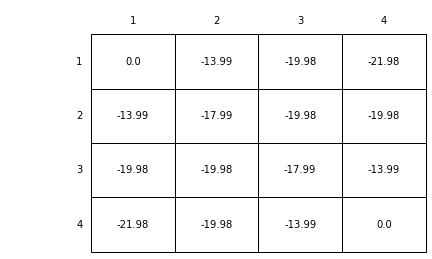

In [143]:
values = B["V"]
draw_image(np.round(values, decimals=2))
print('In-place: {} iterations'.format(asycn_iteration))
print('Synchronous: {} iterations'.format(sync_iteration))

plt.show()